In [1]:
import numpy as np
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize 
from nltk.stem import WordNetLemmatizer
import matplotlib.pyplot as plt
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('stopwords')
nltk.download('punkt')
import pandas as pd
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\AMBUJ\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\AMBUJ\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\AMBUJ\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\AMBUJ\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [2]:
path='C:\\Users\\AMBUJ\\INFOSYS PROJECT\\Emotions_training.csv'
data= pd.read_csv(path)
print(data.head())              #import data


                                                text  label
0                            i didnt feel humiliated      0
1  i can go from feeling so hopeless to so damned...      0
2   im grabbing a minute to post i feel greedy wrong      3
3  i am ever feeling nostalgic about the fireplac...      2
4                               i am feeling grouchy      3


## Preprocessing

In [3]:
# Function to preprocess text
def preprocess_text(text):
    # Convert text to lowercase
    text = text.lower()
    # Remove special characters and numbers
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Tokenize the text
    tokens = word_tokenize(text)
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    # Join tokens back into string
    preprocessed_text = ' '.join(tokens)
    return preprocessed_text

# Apply preprocessing to the 'text' column
data['preprocessed_text'] = data['text'].apply(preprocess_text)

# Display the preprocessed data
print(data[['text', 'preprocessed_text']])



                                                    text  \
0                                i didnt feel humiliated   
1      i can go from feeling so hopeless to so damned...   
2       im grabbing a minute to post i feel greedy wrong   
3      i am ever feeling nostalgic about the fireplac...   
4                                   i am feeling grouchy   
...                                                  ...   
15995  i just had a very brief time in the beanbag an...   
15996  i am now turning and i feel pathetic that i am...   
15997                     i feel strong and good overall   
15998  i feel like this was such a rude comment and i...   
15999  i know a lot but i feel so stupid because i ca...   

                                       preprocessed_text  
0                                  didnt feel humiliated  
1      go feeling hopeless damned hopeful around some...  
2              im grabbing minute post feel greedy wrong  
3      ever feeling nostalgic fireplace kno

## TF-IDF vectorizer

In [4]:
# Initialize TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer()

# Fit and transform the preprocessed text data
X_tfidf = tfidf_vectorizer.fit_transform(data['preprocessed_text'])


print("Shape of feature vectors:", X_tfidf.shape)


Shape of feature vectors: (16000, 13456)


## Plotting Distribution of Emotions


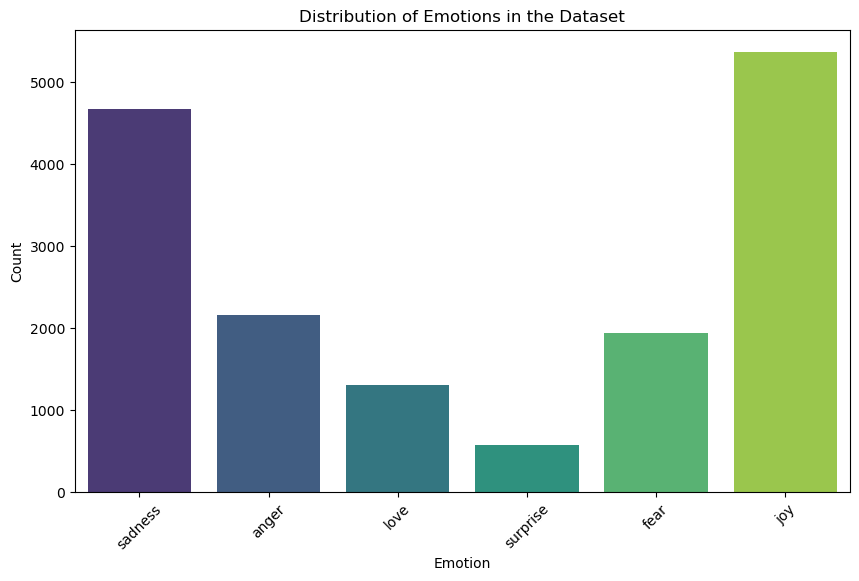

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.DataFrame(data)
# Assuming df is your dataframe containing the input data
# Define the label mapping
label_mapping = {0: 'sadness', 1: 'joy', 2: 'love', 3: 'anger', 4: 'fear', 5: 'surprise'}

# Map the labels to their corresponding emotions
df['emotion'] = df['label'].map(label_mapping)

# Plot the distribution of emotions
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='emotion', palette='viridis')
plt.title('Distribution of Emotions in the Dataset')
plt.xlabel('Emotion')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


In [6]:
from sklearn.model_selection import train_test_split

# Assuming df is your original DataFrame
# First, split the dataset into training (70%) and temporary (30%) sets
train_df, temp_df = train_test_split(data, test_size=0.3, random_state=42)

# Now, split the temporary set into testing (20%) and validation (10%) sets
test_df, val_df = train_test_split(temp_df, test_size=(1/3), random_state=42)

# Check the shapes of the splits to ensure the correct division
print("Training set shape:", train_df.shape)
print("Testing set shape:", test_df.shape)
print("Validation set shape:", val_df.shape)
print("Training Set Sample:")
print(train_df.head())

# print("\nValidation Set Sample:")
# print(val_df.head())

# print("\nTest Set Sample:")
# print(test_df.head())


Training set shape: (11200, 3)
Testing set shape: (3200, 3)
Validation set shape: (1600, 3)
Training Set Sample:
                                                    text  label  \
14741  i actually feel frightened of people here righ...      4   
11539  i wake up every morning not knowing what the h...      0   
14634  i feel pretty weird blogging about deodorant b...      4   
11678                  i say it it makes me feel special      1   
12645  im puzzled because i have been feeling him wig...      0   

                                       preprocessed_text  
14741              actually feel frightened people right  
11539  wake every morning knowing hell feeling like c...  
14634  feel pretty weird blogging deodorant im bit de...  
11678                              say make feel special  
12645  im puzzled feeling wiggle low pelvis feeling b...  


## Performance metrics using Confusion Metrics

In [7]:
# Vectorize the text data
df = pd.DataFrame(data)
tfidf = TfidfVectorizer()

X_train = tfidf.fit_transform(train_df['text'])
X_val = tfidf.transform(val_df['text'])
X_test = tfidf.transform(test_df['text'])

y_train = train_df['label']
y_val = val_df['label']
y_test = test_df['label']
# Initialize and train the model
model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train, y_train)
#evaluate the model
# Predict on training data
y_train_pred = model.predict(X_train)

# Predict on test data
y_test_pred = model.predict(X_test)

# Generate classification report
train_report = classification_report(y_train, y_train_pred, target_names=['sadness', 'joy', 'love', 'anger', 'fear', 'surprise'])
test_report = classification_report(y_test, y_test_pred, target_names=['sadness', 'joy', 'love', 'anger', 'fear', 'surprise'])

print("Training Classification Report:\n", train_report)
print("Test Classification Report:\n", test_report)






Training Classification Report:
               precision    recall  f1-score   support

     sadness       0.94      0.98      0.96      3232
         joy       0.89      0.98      0.94      3781
        love       0.97      0.74      0.84       870
       anger       0.96      0.90      0.93      1552
        fear       0.95      0.89      0.92      1371
    surprise       0.96      0.62      0.75       394

    accuracy                           0.93     11200
   macro avg       0.95      0.85      0.89     11200
weighted avg       0.93      0.93      0.93     11200

Test Classification Report:
               precision    recall  f1-score   support

     sadness       0.87      0.93      0.90       943
         joy       0.77      0.97      0.86      1068
        love       0.90      0.51      0.65       293
       anger       0.88      0.77      0.82       395
        fear       0.89      0.69      0.78       379
    surprise       0.94      0.36      0.52       122

    accuracy   

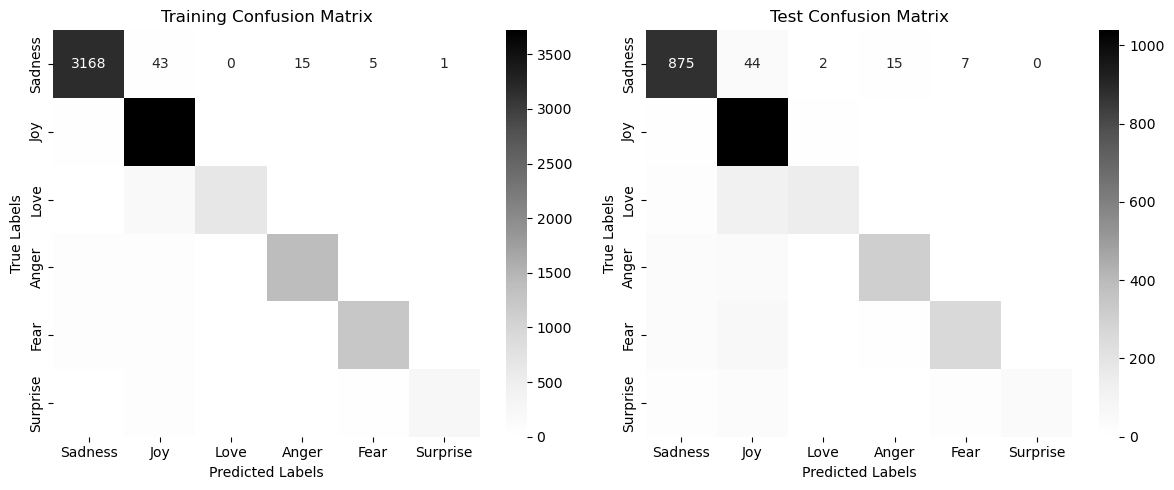

In [20]:

# Generate confusion matrix
train_cm = confusion_matrix(y_train, y_train_pred)
test_cm = confusion_matrix(y_test, y_test_pred)

# Plot confusion matrix
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.heatmap(train_cm, annot=True, fmt='d', ax=axes[0], cmap='Greys', xticklabels=['Sadness', 'Joy', 'Love', 'Anger', 'Fear', 'Surprise'], yticklabels=['Sadness', 'Joy', 'Love', 'Anger', 'Fear', 'Surprise'])
axes[0].set_title('Training Confusion Matrix')
axes[0].set_xlabel('Predicted Labels')
axes[0].set_ylabel('True Labels')

sns.heatmap(test_cm, annot=True, fmt='d', ax=axes[1], cmap='Greys', xticklabels=['Sadness', 'Joy', 'Love', 'Anger', 'Fear', 'Surprise'], yticklabels=['Sadness', 'Joy', 'Love', 'Anger', 'Fear', 'Surprise'])
axes[1].set_title('Test Confusion Matrix')
axes[1].set_xlabel('Predicted Labels')
axes[1].set_ylabel('True Labels')

plt.tight_layout()
plt.show()


## Grid search for Hyperparameter Tuning.

Training set size: 11200
Validation set size: 1600
Test set size: 3200
Best hyperparameters:  {'C': 1.0, 'max_iter': 100, 'solver': 'liblinear'}
Training Classification Report:
               precision    recall  f1-score   support

     sadness       0.99      0.99      0.99      3266
         joy       0.99      0.99      0.99      3754
        love       0.99      0.96      0.97       913
       anger       0.98      0.98      0.98      1511
        fear       0.98      0.98      0.98      1356
    surprise       0.98      0.94      0.96       400

    accuracy                           0.98     11200
   macro avg       0.98      0.97      0.98     11200
weighted avg       0.98      0.98      0.98     11200

Test Classification Report:
               precision    recall  f1-score   support

     sadness       0.93      0.93      0.93       933
         joy       0.88      0.93      0.91      1072
        love       0.84      0.72      0.77       261
       anger       0.88      0.85

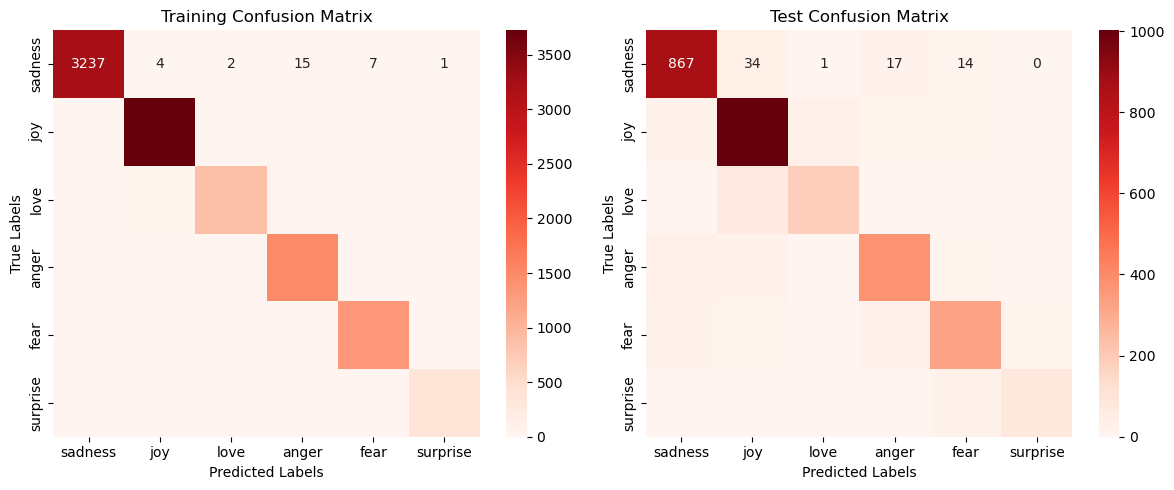

In [8]:

from sklearn.model_selection import train_test_split, GridSearchCV



df = pd.DataFrame(data)

# Split the data
train_val_df, test_df = train_test_split(df, test_size=0.2, random_state=42, stratify=df['label'])
train_df, val_df = train_test_split(train_val_df, test_size=0.125, random_state=42, stratify=train_val_df['label'])

# Check the sizes to confirm
print(f"Training set size: {train_df.shape[0]}")
print(f"Validation set size: {val_df.shape[0]}")
print(f"Test set size: {test_df.shape[0]}")

# Vectorize the text data
vectorizer = CountVectorizer()

X_train = vectorizer.fit_transform(train_df['text'])
X_val = vectorizer.transform(val_df['text'])
X_test = vectorizer.transform(test_df['text'])

y_train = train_df['label']
y_val = val_df['label']
y_test = test_df['label']

# Hyperparameter tuning using GridSearchCV
param_grid = {
    'C': [0.1, 1.0],  # Reduced range for regularization parameter
    'solver': ['liblinear'],  # Using a single solver to reduce computation
    'max_iter': [100]  # Reduced number of iterations
}

grid_search = GridSearchCV(LogisticRegression(random_state=42), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Best model after Grid Search
best_model = grid_search.best_estimator_

# Print best hyperparameters
print("Best hyperparameters: ", grid_search.best_params_)

# Evaluate the best model on the training data
y_train_pred = best_model.predict(X_train)

# Evaluate the best model on the test data
y_test_pred = best_model.predict(X_test)

# Generate classification report
train_report = classification_report(y_train, y_train_pred, target_names=['sadness', 'joy', 'love', 'anger', 'fear', 'surprise'])
test_report = classification_report(y_test, y_test_pred, target_names=['sadness', 'joy', 'love', 'anger', 'fear', 'surprise'])

print("Training Classification Report:\n", train_report)
print("Test Classification Report:\n", test_report)

# Generate confusion matrix
train_cm = confusion_matrix(y_train, y_train_pred)
test_cm = confusion_matrix(y_test, y_test_pred)

# Plot confusion matrix with single color
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.heatmap(train_cm, annot=True, fmt='d', ax=axes[0], cmap='Reds', 
            xticklabels=['sadness', 'joy', 'love', 'anger', 'fear', 'surprise'], 
            yticklabels=['sadness', 'joy', 'love', 'anger', 'fear', 'surprise'])

sns.heatmap(test_cm, annot=True, fmt='d', ax=axes[1], cmap='Reds', 
            xticklabels=['sadness', 'joy', 'love', 'anger', 'fear', 'surprise'], 
            yticklabels=['sadness', 'joy', 'love', 'anger', 'fear', 'surprise'])

axes[0].set_title('Training Confusion Matrix')
axes[0].set_xlabel('Predicted Labels')
axes[0].set_ylabel('True Labels')

axes[1].set_title('Test Confusion Matrix')
axes[1].set_xlabel('Predicted Labels')
axes[1].set_ylabel('True Labels')

plt.tight_layout()
plt.show()


In [10]:
train_accuracy = accuracy_score(y_train, y_train_pred)

test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"Training Accuracy: {train_accuracy:.4f}")

print(f"Test Accuracy: {test_accuracy:.4f}")

Training Accuracy: 0.9839
Test Accuracy: 0.8841
